문제 1: 채널별 고객 획득 비용(CAC) 및 생애 가치(LTV) 분석
목표: 마케팅 채널의 진정한 ROI를 평가하기 위해 CAC와 LTV를 계산하고 최적 투자 전략을 제안하세요.
1. 데이터 로드 및 전처리
2. 채널별 CAC 계산
    - 2024년 데이터만 사용
    - 각 채널별 총 마케팅 비용 집계
    - 각 채널별 신규 고객 수 집계 (2024년 첫 거래 기준)
    - CAC = 총 마케팅 비용 / 신규 고객 수
    - organic과 referral 채널은 CAC = 0으로 처리
3. 고객별 LTV 계산
4. 채널별 LTV 및 ROI 분석
    - 채널별 평균 LTV 계산
    - ROI = LTV / CAC 계산 (organic, referral은 무한대 처리)
    - payback period = CAC / (월평균 구매금액) 계산
5. 시각화 및 전략 제안 (15분)
    - CAC vs LTV 산점도 차트
    - 채널별 ROI 막대 차트
    - 마케팅 예산 재배분 제안 (현재 vs 최적 배분)


문제 2: 고객 코호트 분석 및 유지율 개선 전략
목표: "월별 가입 코호트"의 유지율과 매출 기여도를 분석하여 고객 유지 전략을 수립하세요.
1. 코호트 그룹 생성
2. 월별 유지율 계산
    - 각 거래의 코호트 대비 경과 개월 수 계산
    - 코호트별 Month 0, 1, 2, ... 12에서의 활성 고객 수
    - 유지율 테이블 생성 (코호트 × 경과월)
    - 평균 유지율 곡선 계산
3. 코호트별 매출 기여도 분석
    - 각 코호트의 월별 누적 매출 계산
    - 코호트별 고객 1인당 누적 매출 (ARPU) 계산
    - 6개월 후, 12개월 후 예상 LTV 추정
4. 유지율 히트맵 시각화
5. 개선 전략 수립
    - 유지율이 급격히 감소하는 시점 식별
    - 고성과 코호트 vs 저성과 코호트 특성 비교
    - 유지율 개선을 위한 액션 아이템 3가지 제안

In [2]:

import pandas as pd
import numpy as np

# 1. 데이터 로드 및 전처리
marketing_df = pd.read_csv('/Users/gim-yujin/Desktop/TIL/데이터분석 /marketing_performance.csv')
transactions_df = pd.read_csv('/Users/gim-yujin/Desktop/TIL/데이터분석 /customer_transactions (1).csv')
marketing_df 

,month,channel,marketing_spend,new_customers,website_visits,conversions
0,2023-01-01,organic,0.000000,28,511,28
1,2023-01-01,paid_search,11986.882840,19,995,19
2,2023-01-01,social_media,4235.453095,17,1048,17
3,2023-01-01,email,1693.773605,17,1037,17
4,2023-01-01,referral,887.489645,10,958,10
...,...,...,...,...,...,...
115,2024-12-01,organic,0.000000,27,505,27
116,2024-12-01,paid_search,6149.273297,20,999,20
117,2024-12-01,social_media,4668.252208,14,1028,14
118,2024-12-01,email,1496.013316,9,1013,9


In [3]:
# 날짜 형식으로 변환
""" 
파일에 저장된 날짜 데이터는 종종 문자열(object) 형태로 읽히기 때문에, 
판다스(pandas)는 이를 날짜(datetime) 형식으로 명시적으로 변환해야 날짜 기반 연산
(예: 년도 추출, 기간 계산)을 정확하게 수행할 수 있습니다
"""
marketing_df['month'] = pd.to_datetime(marketing_df['month'])
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['registration_date'] = pd.to_datetime(transactions_df['registration_date'])


In [4]:
# 2. 채널별 CAC 계산 (2024년 데이터만 사용)
""" 
1. 24년 데이터만 marketing data 에서 뽑아오기
2. marketing_2024에 24년 데이터만 추출하여 뽑기 (dt.year ==2024)
3. 채널별! CAC = 총 마케팅 비용(marketing_spend)/ 신규 고객 수(new_customer)을 channel 별로 마케팅 비용과
신규고객을 합산하여 나타냄

"""


marketing_2024 = marketing_df[marketing_df['month'].dt.year == 2024]
channel_marketing_spend = marketing_2024.groupby('channel')['marketing_spend'].sum()
channel_new_customers_marketing = marketing_2024.groupby('channel')['new_customers'].sum()
 
 
marketing_2024

,month,channel,marketing_spend,new_customers,website_visits,conversions
60,2024-01-01,organic,0.000000,18,471,18
61,2024-01-01,paid_search,8760.203892,18,991,18
62,2024-01-01,social_media,5272.708407,15,992,15
63,2024-01-01,email,1957.893749,12,1050,12
64,2024-01-01,referral,1288.390831,6,983,6
65,2024-02-01,organic,0.000000,21,501,21
66,2024-02-01,paid_search,6758.754072,9,996,9
67,2024-02-01,social_media,5096.866032,12,1000,12
68,2024-02-01,email,2053.619904,10,997,10
69,2024-02-01,referral,349.933305,9,961,9


In [5]:
# 2024년 첫 거래 고객을 기준으로 신규 고객 수 집계
""" 
트랜잭션 데이터 기준 
정의: 2024년에 첫 번째 구매를 한 고객

특징: 마케팅 캠페인에 직접적으로 노출되지 않았지만, 다른 채널(예: 추천)을 통해 유입되어 첫 구매를 한 고객이 포함될 수 있습니다.

용도: 실제 매출 발생에 기여한 고객 수를 측정하는 데 사용됩니다. LTV(고객 생애 가치) 계산의 시작점이 됩니다.

마케팅 데이터 기준
마케팅 데이터에서는 **'마케팅 캠페인에 노출되어 전환된 시점'**을 기준으로 신규 고객을 정의합니다.

정의: 2024년에 특정 마케팅 채널을 통해 유입된 고객

특징: 캠페인을 통해 웹사이트를 방문하거나 가입했지만, 아직 첫 구매를 하지 않은 고객이 포함될 수 있습니다.

용도: 특정 마케팅 채널의 직접적인 성과를 평가하고 CAC(고객 획득 비용)를 계산하는 데 사용됩니다

코드 정확히 알기 
sort_values()함수는 데이터프레임에서 특정 열이나 행을 기준으로 데이터를 정렬하는데 사용되는 함수다. 
"""
# 2024년 첫 거래 고객을 기준으로 신규 고객 수 집계
first_transaction_2024 = transactions_df[transactions_df['transaction_date'].dt.year == 2024]
first_transaction_2024 = first_transaction_2024.sort_values('transaction_date').drop_duplicates('customer_id')

new_customers_2024 = first_transaction_2024[
    first_transaction_2024['registration_date'].dt.year == 2024
] #조건에 맞는 행들만 필터링 하여 새로운 데이터프레임 반환 ,괄호 한번만 하면 불리언 시리즈를 반환한다. 
channel_new_customers_transaction = new_customers_2024.groupby('acquisition_channel')['customer_id'].count()

channel_new_customers_transaction

 

acquisition_channel
email            64
organic         139
paid_search     121
referral         39
social_media     90
Name: customer_id, dtype: int64

In [6]:
 # CAC 계산
#새로운데이터프레임 생성함수 
cac_df = pd.DataFrame({
    'total_marketing_spend': channel_marketing_spend,#체널별 총 마케팅 비용계상
    'new_customers': channel_new_customers_transaction #신규고객 
}).fillna(0)
cac_df['cac'] = cac_df['total_marketing_spend'] / cac_df['new_customers']

# organic과 referral 채널은 CAC(채널 고객획득비용)를 0으로 설정
cac_df.loc[['organic', 'referral'], 'cac'] = 0

print("2024년 채널별 CAC:")
print(cac_df)

cac_df

2024년 채널별 CAC:
              total_marketing_spend  new_customers         cac
email                  17763.268813             64  277.551075
organic                    0.000000            139    0.000000
paid_search            97849.029394            121  808.669664
referral               11867.432377             39    0.000000
social_media           59628.676756             90  662.540853


,total_marketing_spend,new_customers,cac
email,17763.268813,64,277.551075
organic,0.000000,139,0.000000
paid_search,97849.029394,121,808.669664
referral,11867.432377,39,0.000000
social_media,59628.676756,90,662.540853


In [9]:
# 3. 고객별 LTV 계산
# 평균 유지 기간 (단순화를 위해, 첫 거래부터 마지막 거래까지의 평균 기간으로 계산)
customer_lifetime = transactions_df.groupby('customer_id')['transaction_date'].agg(['min', 'max'])
customer_lifetime['lifetime_days'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days
avg_lifetime_days = customer_lifetime['lifetime_days'].mean()
avg_lifetime_years = avg_lifetime_days / 365.25


In [11]:
# 고객별 총 구매 금액
customer_total_spend = transactions_df.groupby('customer_id')['order_value'].sum()
transactions_df

,customer_id,registration_date,acquisition_channel,customer_segment,transaction_date,order_value,product_category
0,1,2023-04-13,email,premium,2023-04-15,104.24,Books
1,1,2023-04-13,email,premium,2023-11-16,141.21,Electronics
2,1,2023-04-13,email,premium,2023-11-19,129.03,Books
3,1,2023-04-13,email,premium,2023-08-29,67.59,Home
4,1,2023-04-13,email,premium,2023-10-08,102.30,Books
...,...,...,...,...,...,...,...
3394,998,2024-06-07,paid_search,standard,2024-06-07,109.13,Fashion
3395,998,2024-06-07,paid_search,standard,2024-12-08,81.54,Electronics
3396,999,2024-07-06,paid_search,basic,2024-07-30,25.21,Books
3397,1000,2024-05-04,social_media,standard,2024-05-13,67.35,Home


In [12]:
# 고객별 LTV (평균 구매 금액 * 구매 횟수 * 평균 유지 기간)
customer_transactions_count = transactions_df.groupby('customer_id')['transaction_date'].count()
customer_avg_spend = customer_total_spend / customer_transactions_count
customer_ltv = customer_avg_spend * customer_transactions_count * (avg_lifetime_years / (customer_lifetime['lifetime_days'] / 365.25))
customer_ltv = customer_total_spend

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil


최종 채널별 분석 결과:
                     cac         LTV       ROI  payback_period_months
email         277.551075  295.638601  1.065168               5.899523
organic         0.000000  285.133960       inf               0.000000
paid_search   808.669664  286.029084  0.353703              17.188783
referral        0.000000  309.750274       inf               0.000000
social_media  662.540853  282.330594  0.426133              14.082723


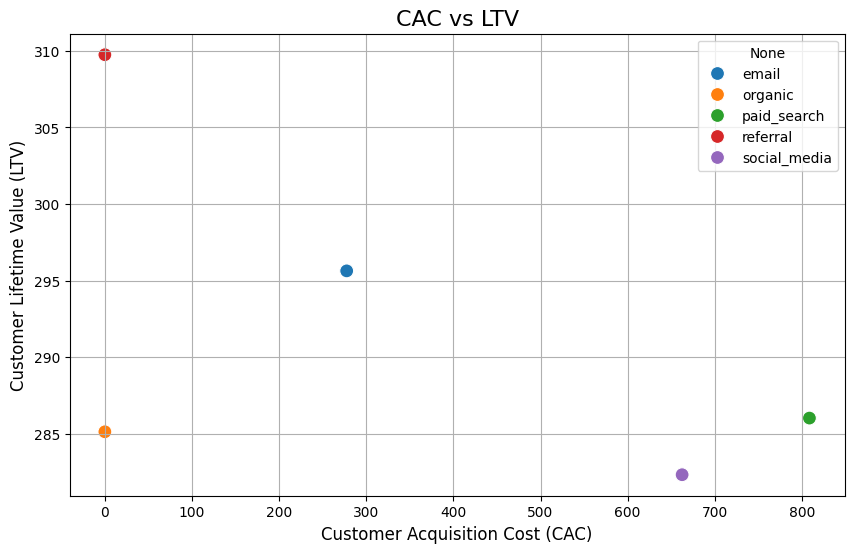

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

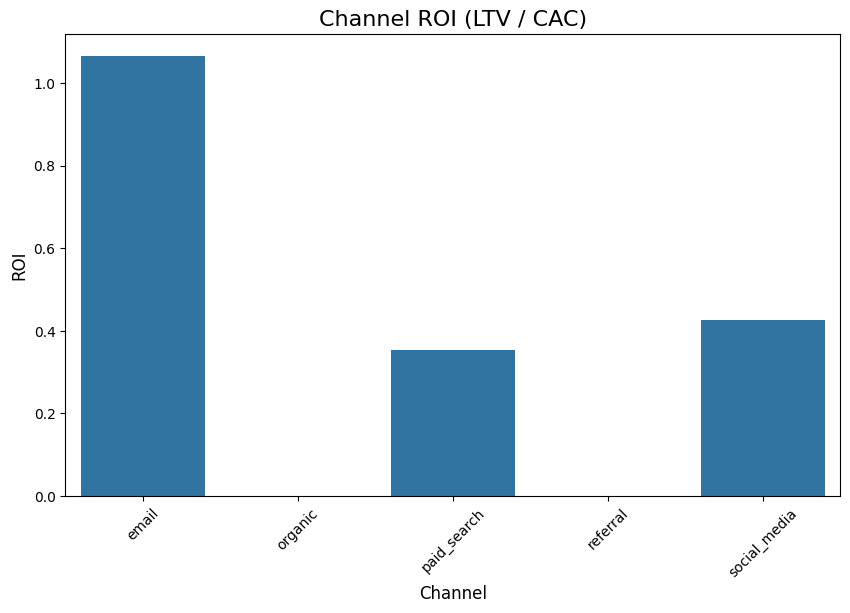

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil


현재 마케팅 예산 배분:
channel
paid_search     0.522954
social_media    0.318685
email           0.094936
referral        0.063425
organic         0.000000
Name: marketing_spend, dtype: float64

최적 마케팅 예산 배분 제안 (ROI 기반):
email           0.0
paid_search     0.0
social_media    0.0
organic         NaN
referral        NaN
Name: ROI, dtype: float64


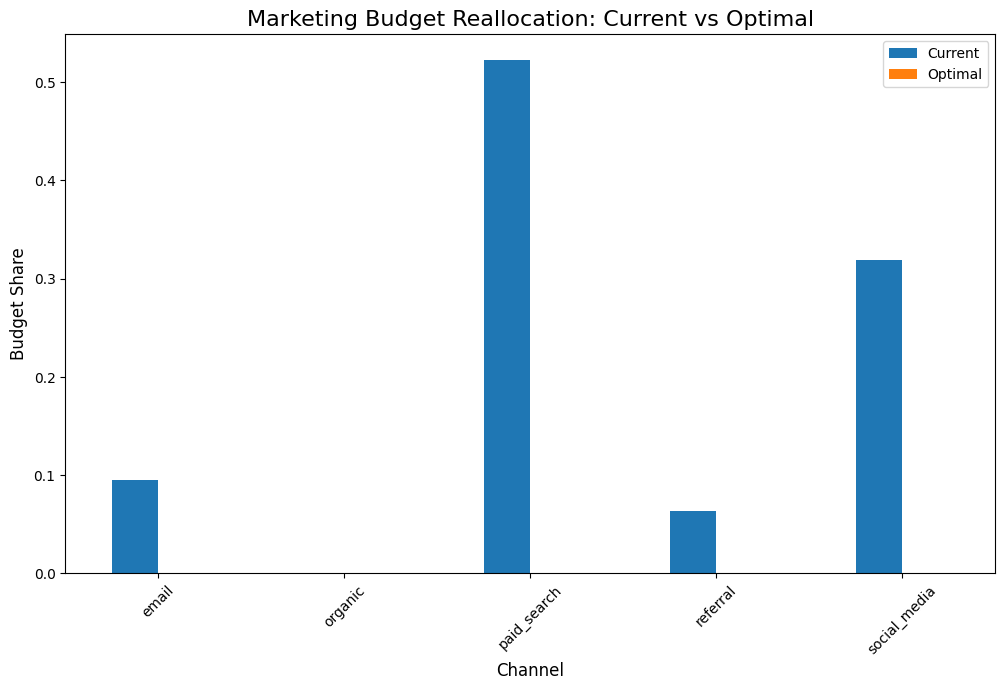

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# LTV 계산에 사용할 데이터프레임 병합
customer_acquisition = transactions_df.sort_values('registration_date').drop_duplicates('customer_id')[['customer_id', 'acquisition_channel']]
customer_data = pd.merge(customer_acquisition, customer_ltv.rename('LTV'), on='customer_id')

# 4. 채널별 LTV 및 ROI 분석
channel_ltv = customer_data.groupby('acquisition_channel')['LTV'].mean()

# CAC와 LTV를 병합
final_analysis_df = pd.merge(cac_df, channel_ltv.rename('LTV'), left_index=True, right_index=True)

# ROI 계산
final_analysis_df['ROI'] = final_analysis_df['LTV'] / final_analysis_df['cac']
final_analysis_df.loc[['organic', 'referral'], 'ROI'] = float('inf')

# Payback Period 계산
transactions_per_month = transactions_df.groupby('customer_id').size().mean()
avg_monthly_spend = transactions_df['order_value'].mean() * (transactions_per_month / (avg_lifetime_days/30.44))

final_analysis_df['payback_period_months'] = final_analysis_df['cac'] / avg_monthly_spend

print("\n최종 채널별 분석 결과:")
print(final_analysis_df[['cac', 'LTV', 'ROI', 'payback_period_months']])

# 5. 시각화 및 전략 제안
# CAC vs LTV 산점도 차트
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_analysis_df, x='cac', y='LTV', hue=final_analysis_df.index, s=100)
plt.title('CAC vs LTV', fontsize=16)
plt.xlabel('Customer Acquisition Cost (CAC)', fontsize=12)
plt.ylabel('Customer Lifetime Value (LTV)', fontsize=12)
plt.grid(True)
plt.show()

# 채널별 ROI 막대 차트
plt.figure(figsize=(10, 6))
roi_to_plot = final_analysis_df['ROI'].replace(float('inf'), final_analysis_df['ROI'].max() * 1.2)
sns.barplot(x=final_analysis_df.index, y=roi_to_plot)
plt.title('Channel ROI (LTV / CAC)', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 마케팅 예산 재배분 제안
# 현재 예산 배분
current_budget = marketing_2024.groupby('channel')['marketing_spend'].sum()
current_budget_share = current_budget / current_budget.sum()
print("\n현재 마케팅 예산 배분:")
print(current_budget_share.sort_values(ascending=False))

# 최적 예산 배분 제안 (ROI 기반)
# ROI가 높을수록 더 많은 예산을 할당
optimal_budget_share = final_analysis_df['ROI'].replace(float('inf'), final_analysis_df['ROI'].max() * 2)
optimal_budget_share = optimal_budget_share / optimal_budget_share.sum()
print("\n최적 마케팅 예산 배분 제안 (ROI 기반):")
print(optimal_budget_share.sort_values(ascending=False))

# 시각화: 현재 vs 최적 예산
budget_df = pd.DataFrame({
    'Current': current_budget_share,
    'Optimal': optimal_budget_share
})
budget_df.plot(kind='bar', figsize=(12, 7))
plt.title('Marketing Budget Reallocation: Current vs Optimal', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Budget Share', fontsize=12)
plt.xticks(rotation=45)
plt.show()

